In [32]:
in_colab = 'google.colab' in str(get_ipython())
if in_colab == True:
  !pip install yfinance
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
  from sklearn.kernel_ridge import KernelRidge
  import numpy as np
  from sklearn.metrics import mean_squared_error, r2_score
else:
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
  from sklearn.kernel_ridge import KernelRidge
  import numpy as np
  from sklearn.metrics import mean_squared_error, r2_score

In [78]:
crypto_btc = yf.download(tickers='BTC-USD', start='2017-12-01', end='2022-12-31').drop(columns=['Adj Close','High', 'Low']).round(2).reset_index()

[*********************100%***********************]  1 of 1 completed


In [79]:
crypto_btc

,Date,Open,Close,Volume
0,2017-12-01 00:00:00+00:00,10198.60,10975.60,6783119872
1,2017-12-02 00:00:00+00:00,10978.30,11074.60,5138500096
2,2017-12-03 00:00:00+00:00,11082.70,11323.20,6608309760
3,2017-12-04 00:00:00+00:00,11315.40,11657.20,6132409856
4,2017-12-05 00:00:00+00:00,11685.70,11916.70,6895260160
...,...,...,...,...
1851,2022-12-26 00:00:00+00:00,16842.25,16919.80,11886957804
1852,2022-12-27 00:00:00+00:00,16919.29,16717.17,15748580239
1853,2022-12-28 00:00:00+00:00,16716.40,16552.57,17005713920
1854,2022-12-29 00:00:00+00:00,16552.32,16642.34,14472237479


<AxesSubplot:xlabel='Date'>

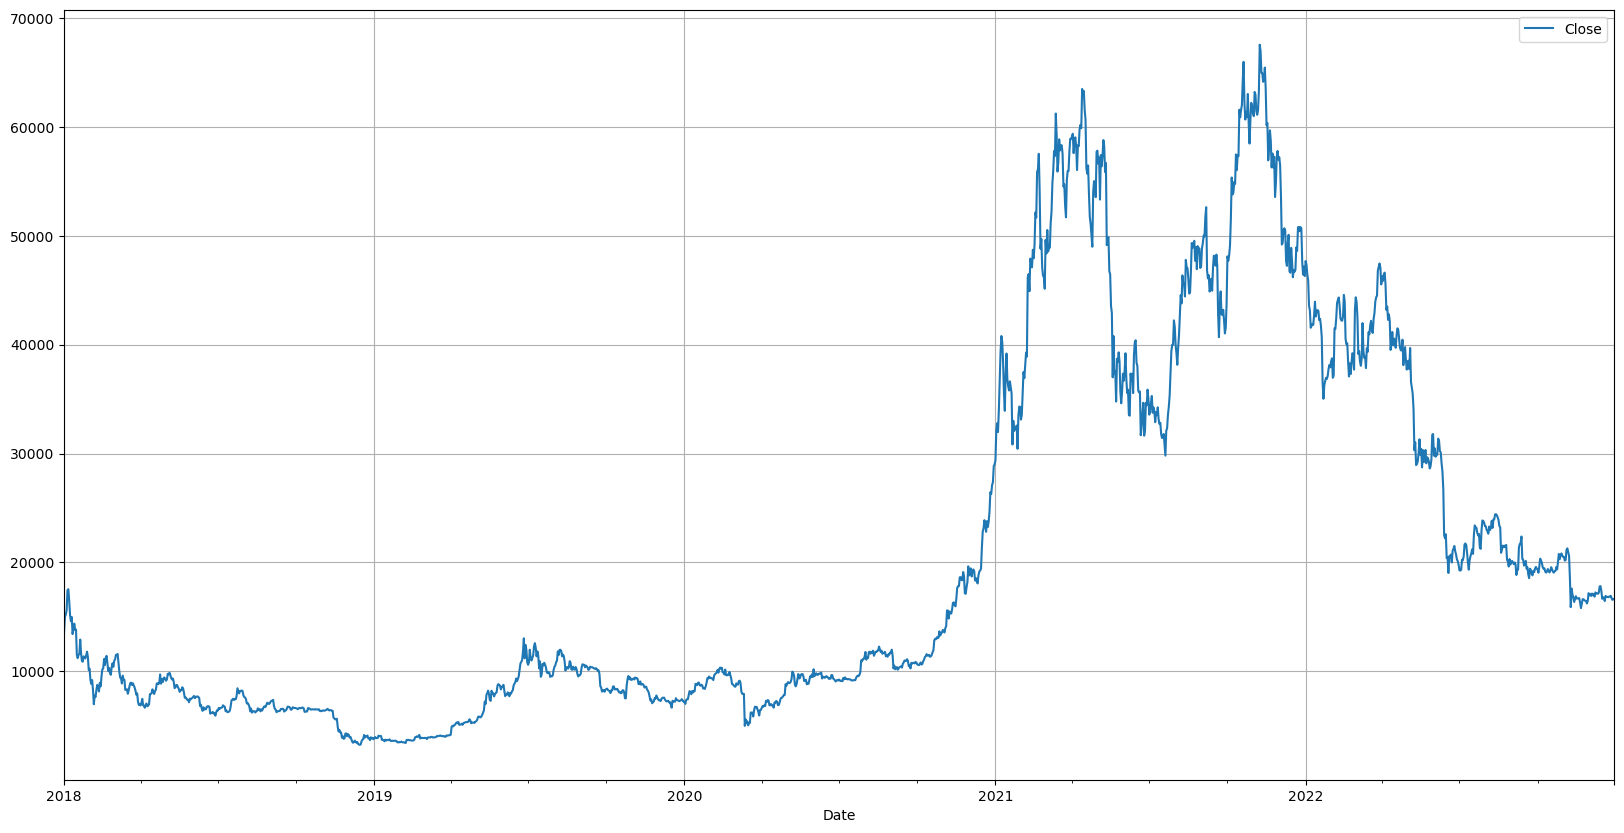

In [35]:
crypto_btc.plot(
    x = 'Date',
    y = 'Close',
    grid = True,
    figsize = (20,10)
)

In [ ]:
crypto_btc2 = yf.download(tickers='BTC-USD', start='2023-01-01', end='2023-01-31').drop(columns=['Adj Close','High', 'Low']).round(2).reset_index()

In [ ]:
'''
df = ()
def kernel_predict(df_pred):
    X = df.drop(columns=['Date'])
    y = df[['Close']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)
    if df is crypto_btc:
        kr = KernelRidge(kernel='linear', alpha=5000)
    else:
        kr = KernelRidge(kernel='polynomial', degree=1, gamma=.05)
    kr.fit(X_train, y_train)
    predict = kr.predict(X)
    if df is crypto_btc:
        df_pred = df.copy().drop(columns=['Open','Volume']).rename(columns={'Close':'Actual Price'})
    else:
        df_pred = df.copy().drop(columns=['Open']).rename(columns={'Close':'Actual Price'})
    df_pred['Predicted Price'] = predict
    df_pred['Price Accuracy']= (df_pred['Predicted Price']/df_pred['Actual Price']-1)*100
    return df_pred
'''

In [43]:
X = crypto_btc.drop(columns=['Date'])
y = crypto_btc[['Close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)
kr = KernelRidge(kernel='linear', alpha=5000)
kr.fit(X_train, y_train)
predict = kr.predict(crypto_btc.drop(columns=['Date']))
btc_rmse = np.sqrt(mean_squared_error(y['Close'], predict))
crypto_btc_pred = crypto_btc.copy().drop(columns=['Open','Volume']).rename(columns={'Close':'Actual Price'})
crypto_btc_pred['Predicted Price'] = predict
crypto_btc_pred['Price Accuracy']= (crypto_btc_pred['Predicted Price']/crypto_btc_pred['Actual Price']-1)*100
    

/Users/playb3yond40gb/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


In [44]:
crypto_btc_pred

,Date,Actual Price,Predicted Price,Price Accuracy
0,2018-01-01 00:00:00+00:00,13657.20,13719.0,0.452509
1,2018-01-02 00:00:00+00:00,14982.10,14796.0,-1.242149
2,2018-01-03 00:00:00+00:00,15201.00,15150.0,-0.335504
3,2018-01-04 00:00:00+00:00,15599.20,15528.0,-0.456434
4,2018-01-05 00:00:00+00:00,17429.50,17130.0,-1.718351
...,...,...,...,...
1820,2022-12-26 00:00:00+00:00,16919.80,16881.0,-0.229317
1821,2022-12-27 00:00:00+00:00,16717.17,16728.0,0.064784
1822,2022-12-28 00:00:00+00:00,16552.57,16526.0,-0.160519
1823,2022-12-29 00:00:00+00:00,16642.34,16616.0,-0.158271


In [45]:
crypto_btc_pred['Price Accuracy'].describe()

count    1825.000000
mean       -0.279109
std         0.673597
min        -4.667928
25%        -0.586973
50%        -0.226139
75%         0.057690
max         7.910413
Name: Price Accuracy, dtype: float64

In [49]:
print(f"BTC Kernel Ridge RMSE is {btc_rmse.round(2)}")

BTC Kernel Ridge RMSE is 151.49


In [108]:
future_df = pd.DataFrame()
  

future_df['Date'] = pd.date_range('2018-01-01', periods = 1856, freq ='1D')
future_df[['Close','Open','Volume']]= (0)

future_df

,Date,Close,Open,Volume
0,2018-01-01,0,0,0
1,2018-01-02,0,0,0
2,2018-01-03,0,0,0
3,2018-01-04,0,0,0
4,2018-01-05,0,0,0
...,...,...,...,...
1851,2023-01-26,0,0,0
1852,2023-01-27,0,0,0
1853,2023-01-28,0,0,0
1854,2023-01-29,0,0,0


In [123]:
X = crypto_btc.drop(columns=['Date'])
y = crypto_btc[['Close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)
kr = KernelRidge(kernel='linear', alpha=5000)
kr.fit(X_train, y_train)
predict = kr.predict(crypto_btc.drop(columns=['Date']))
btc_rmse = np.sqrt(mean_squared_error(y['Close'], predict))
btc_future = future_df.copy().drop(columns=['Open','Volume']).rename(columns={'Close':'Actual Price'})
btc_future['Predicted Price'] = predict

btc_future 

/Users/playb3yond40gb/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


,Date,Actual Price,Predicted Price
0,2018-01-01,0,10932.0
1,2018-01-02,0,11040.0
2,2018-01-03,0,11278.0
3,2018-01-04,0,11604.0
4,2018-01-05,0,11874.0
...,...,...,...
1851,2023-01-26,0,16868.0
1852,2023-01-27,0,16636.0
1853,2023-01-28,0,16464.0
1854,2023-01-29,0,16556.0


In [129]:
crypto_btc2 = yf.download(tickers='BTC-USD', start='2018-01-01', end='2023-01-30').drop(columns=['Adj Close','High', 'Low']).round(2).reset_index()
btc_future['Actual Price'] = crypto_btc2['Close']
btc_future['Price Accuracy']= (btc_future['Predicted Price']/btc_future['Actual Price']-1)*100
btc_future.tail(30)

[*********************100%***********************]  1 of 1 completed


,Date,Actual Price,Predicted Price,Price Accuracy
1826,2023-01-01,16625.08,16888.0,1.581466
1827,2023-01-02,16688.47,16984.0,1.770863
1828,2023-01-03,16679.86,16820.0,0.840175
1829,2023-01-04,16863.24,17024.0,0.953316
1830,2023-01-05,16836.74,16824.0,-0.075668
1831,2023-01-06,16951.97,16992.0,0.236138
1832,2023-01-07,16955.08,16768.0,-1.103386
1833,2023-01-08,17091.14,17096.0,0.028436
1834,2023-01-09,17196.55,17016.0,-1.049920
1835,2023-01-10,17446.29,17064.0,-2.191240


<AxesSubplot:xlabel='Date'>

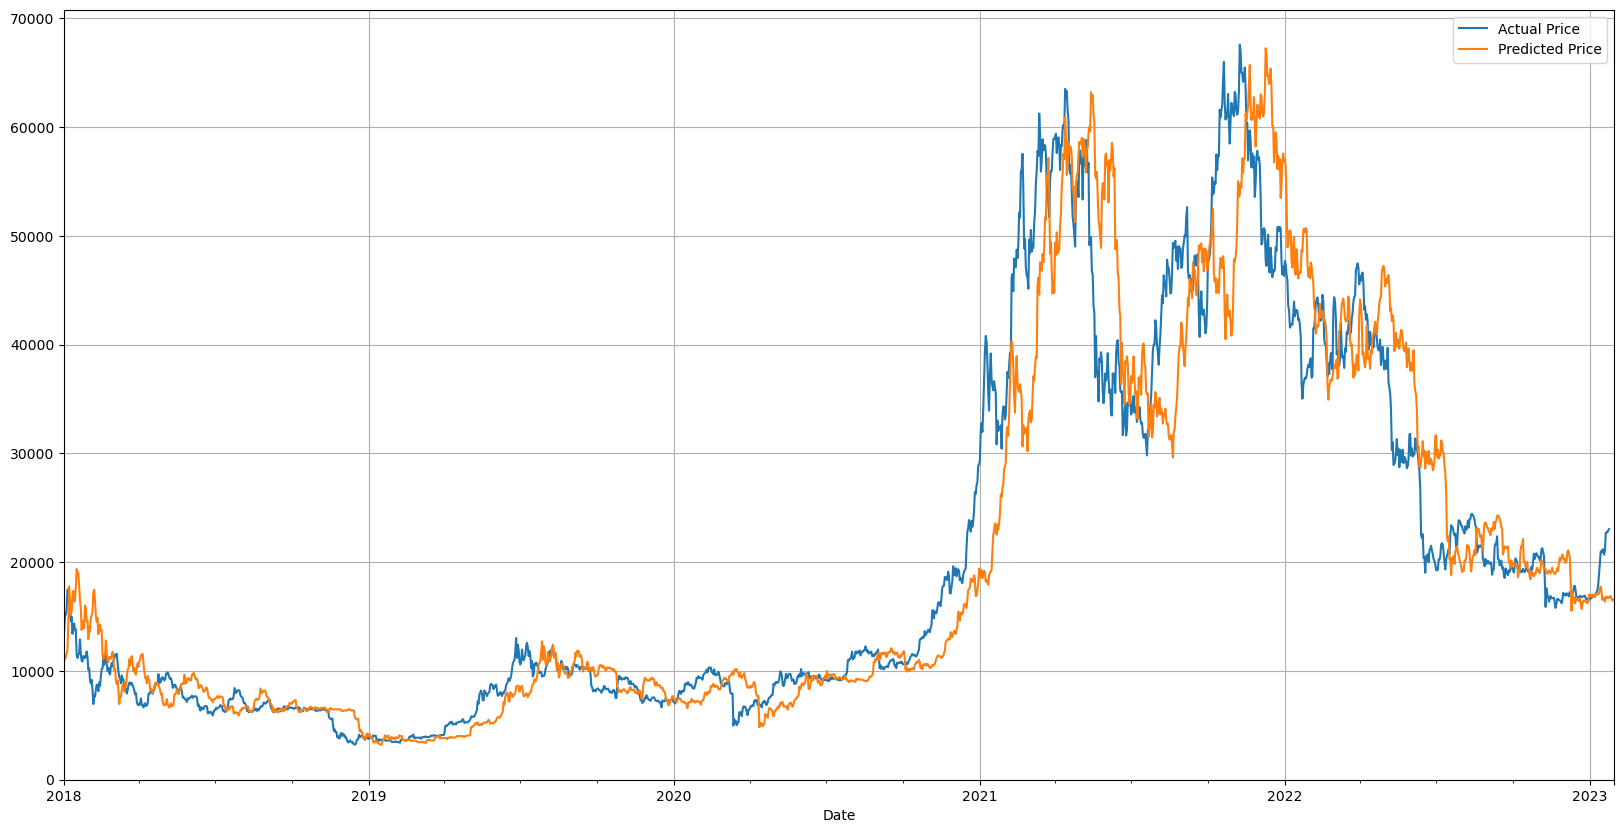

In [125]:
btc_future.plot(
    x='Date',
    y=['Actual Price','Predicted Price'],
    grid = True,
    figsize=(20,10)
)